*샘플링

모집단   전수조사
샘플     표본조사

현실에서는 데이터가 부족하기 때문에 샘플링이 중요

0       1
안전    부도
990     10     데이터 1000건

980     5      예측력(정확도 98.5%)

부도기업을 찾아내는 게 과제라고 했을 때, 50%에 불과. 모델의 성능이 좋다고 말할 수 없음

accuracy 정확도: 전체적으로 얼마나 잘 맞췄느냐

Precision 정밀도: 모델이 얼마나 정확하게 분류했느냐

Recall 재현율: 실제 현상을 얼마나 잘 발견했는가


(1을 더 잘 찾아내기 위해서) 샘플링 방법 변화

0       1
안전    부도
990     10      데이터 1000건
10      10      20건만 가지고 학습! (undersampling)

* 상관계수

음의 상관관계  -1.0
양의 상관관계   1.0

상관계수행렬


* 데이터를 학습용과 검증용으로 나누는 이유
기출문제 & 예상문제를 함께 공부
80 : 20
70 : 30

과적합(과대적합) overfitting 
과소적합        underfitting




# 정형데이터 '분류기' 머신러닝 방법론 비교

- 로지스틱 회귀분석: logistic, sigmoid 0.0~1.0
- 의사결정나무: 규칙기반 알고리즘 / 단점 과적합되기 쉬움
- 랜덤포레스트: 의사결정나무 모델들 앙상블
- 사례기반추론: 데이터와 가장 유사한 데이터를 찾아 분류 (KNN)
- SVM Support Vector Machine
- 인공신경망: 장점 학습이 잘됨 / 단점 설명력이 약함

(설명력이 좋은 모델: 로지스틱 회귀분석, 의사결정나무)

### 1.머신러닝 방법론 비교
### 예시) 대학평가데이터

In [1]:
import pandas as pd
df = pd.read_csv('Data/school.csv')
df.head(3)

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0


In [6]:
cols = df.columns[:8]
x = df[cols]
y = df['Label']
y.value_counts()

Label
0    2158
1     445
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트설정
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

Text(0.5, 1.0, '분류\n (0: bad, 1:good)')

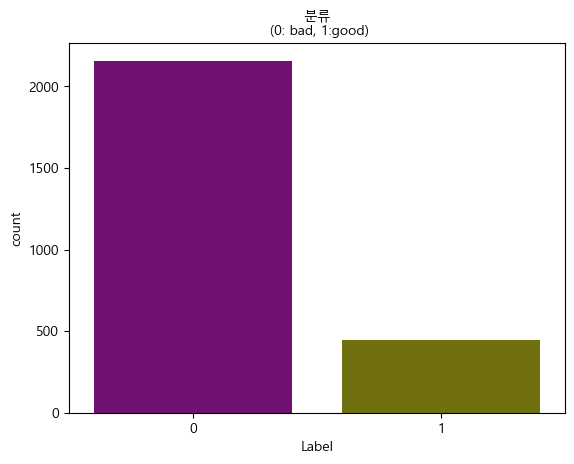

In [9]:
import seaborn as sns
sns.countplot(x='Label', data=df, palette= ['purple','olive'])
plt.title('분류\n (0: bad, 1:good)', fontsize = 10)

In [11]:
# under sampling
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(x, y)

In [14]:
y_sample = pd.DataFrame(data= y_sample, columns = ['Label'])
df_sample = pd.concat([x_sample, y_sample], axis = 1)
df_sample['Label'].value_counts()

Label
0    445
1    445
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x_sample, y_sample, stratify=y_sample, random_state=10, test_size=0.2)

In [19]:
##### Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=10, max_iter=1000)
logistic.fit(x_tr, y_tr)

print("학습용: ", logistic.score(x_tr, y_tr))
print("검증용: ", logistic.score(x_ts, y_ts))

학습용:  0.8890449438202247
검증용:  0.8539325842696629


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# MinMax scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_tr)
x_tr_scaled = mm.transform(x_tr)
x_ts_scaled = mm.transform(x_ts)

In [20]:
logistic_sc = LogisticRegression(random_state=10, max_iter=1000)
logistic_sc.fit(x_tr_scaled, y_tr)

print("학습용: ", logistic_sc.score(x_tr_scaled, y_tr))
print("검증용: ", logistic_sc.score(x_ts_scaled, y_ts))

학습용:  0.9859550561797753
검증용:  0.9831460674157303


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# StandardScaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_tr)
x_tr_scaled = pd.DataFrame(scaler.transform(x_tr))
x_ts_scaled = pd.DataFrame(scaler.transform(x_ts))

In [22]:
# 다양한 알고리즘별 정확도 저장 리스트
result_tr = []
result_te = []

In [23]:
logistic_st = LogisticRegression(random_state=10, max_iter=1000)
logistic_st.fit(x_tr_scaled, y_tr)

print("학습용: ", logistic_st.score(x_tr_scaled, y_tr))
print("검증용: ", logistic_st.score(x_ts_scaled, y_ts))

학습용:  0.9887640449438202
검증용:  0.9943820224719101


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
score_tr=logistic_st.score(x_tr_scaled, y_tr)
score_te=logistic_st.score(x_ts_scaled, y_ts)
print("학습용:",score_tr)
print("검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9887640449438202
검증용: 0.9943820224719101


In [44]:
logistic_st.predict(x_ts_scaled)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [45]:
logistic_st.predict_proba(x_ts_scaled)     # 0/1 이진분류 확률값

array([[9.96929784e-01, 3.07021620e-03],
       [9.26525895e-01, 7.34741047e-02],
       [1.56298955e-03, 9.98437010e-01],
       [4.34406620e-06, 9.99995656e-01],
       [9.72315368e-01, 2.76846321e-02],
       [2.21196977e-02, 9.77880302e-01],
       [5.43871295e-05, 9.99945613e-01],
       [9.89294570e-01, 1.07054297e-02],
       [1.10312806e-01, 8.89687194e-01],
       [9.99999736e-01, 2.63640671e-07],
       [2.86942747e-02, 9.71305725e-01],
       [9.99991900e-01, 8.09965636e-06],
       [9.99600866e-01, 3.99134331e-04],
       [6.78777003e-05, 9.99932122e-01],
       [2.85995055e-02, 9.71400495e-01],
       [9.91620070e-05, 9.99900838e-01],
       [9.99997386e-01, 2.61396194e-06],
       [9.99922040e-01, 7.79599100e-05],
       [4.56420272e-08, 9.99999954e-01],
       [9.99990919e-01, 9.08090126e-06],
       [9.99952811e-01, 4.71892352e-05],
       [1.64862220e-01, 8.35137780e-01],
       [8.74012431e-03, 9.91259876e-01],
       [4.91778164e-02, 9.50822184e-01],
       [3.016373

In [25]:
##### 의사결정나무
# 규칙기반
# 스케일링이 중요하지 않음

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(x_tr_scaled, y_tr)
print("학습용: ", tree.score(x_tr_scaled, y_tr))
print("검증용: ", tree.score(x_ts_scaled, y_ts))

학습용:  1.0
검증용:  0.9719101123595506


In [26]:
# max_depth 가지치기
tree = DecisionTreeClassifier(random_state=10, max_depth=4)
tree.fit(x_tr_scaled, y_tr)
score_tr=tree.score(x_tr_scaled, y_tr)
score_te=tree.score(x_ts_scaled, y_ts)
print("학습용:",score_tr)
print("검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9789325842696629
검증용: 0.9775280898876404


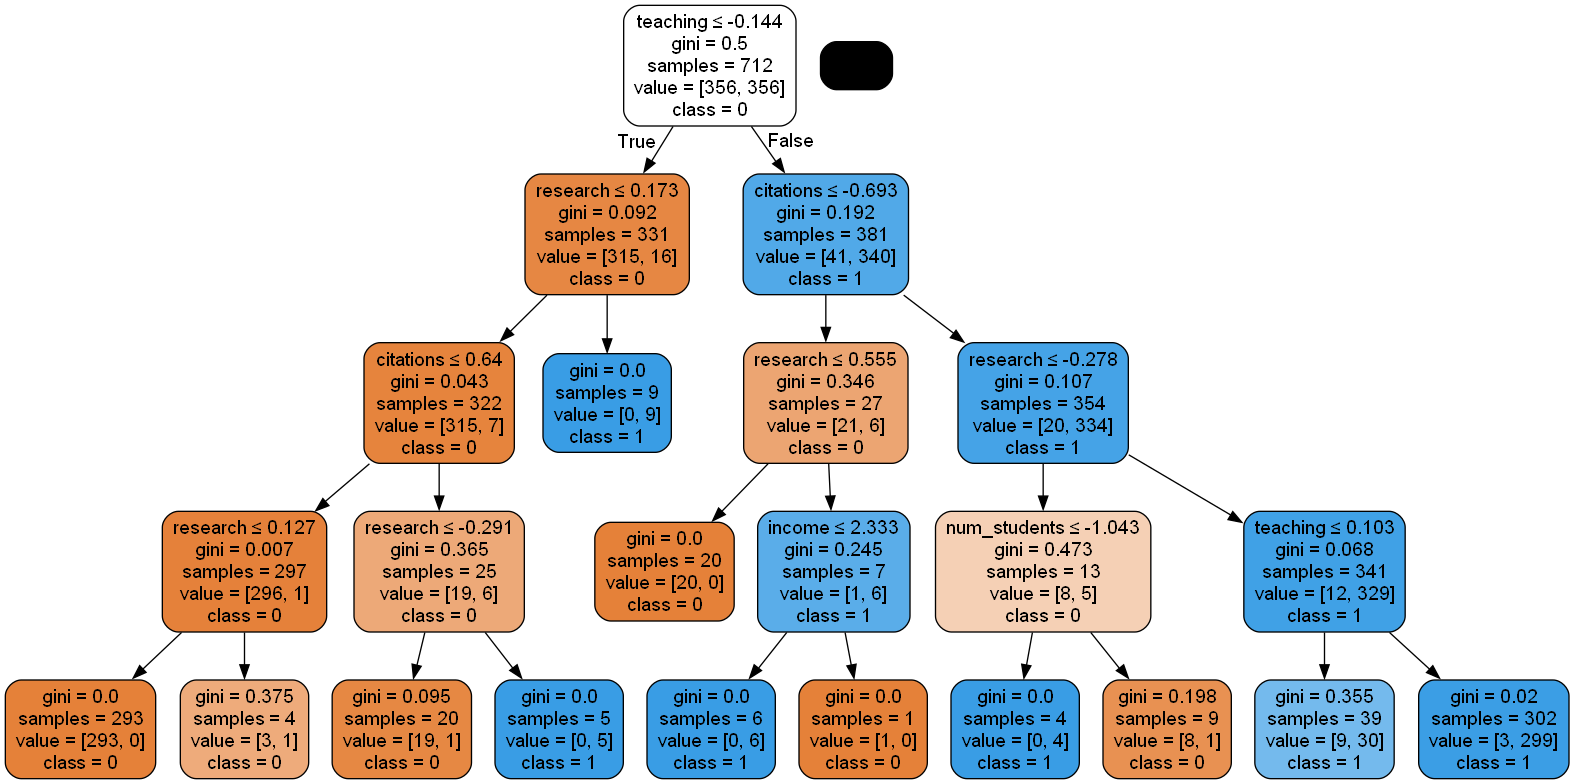

In [28]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names= cols, 
                           class_names=["0","1"], 
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

* gini가 0.5에 가까우면, 학습이 더 필요하다는 뜻임

entropy 혼잡도
        0       1
                50:50
        100:0
        0:100

gini    0       0.5  


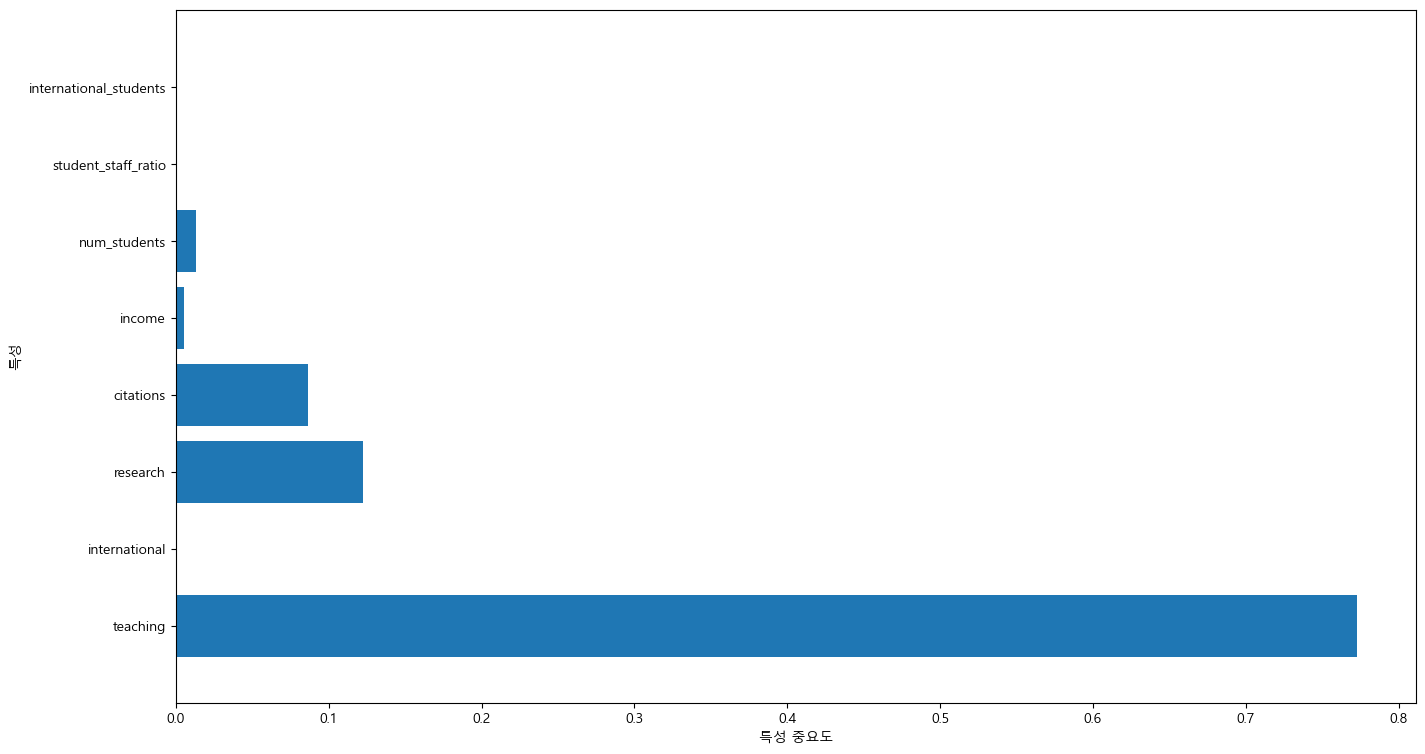

In [29]:
### 특성중요도
# 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
# 0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)

import numpy as np
def plot_tree(model):
    n_features = x.shape[1]
    plt.rcParams['figure.figsize'] = (16, 9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
plot_tree(tree)


In [30]:
##### RandomForest 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(x_tr_scaled, y_tr)

score_tr=forest.score(x_tr_scaled, y_tr)
score_te=forest.score(x_ts_scaled, y_ts)
print("학습용:",score_tr)
print("검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

c:\Python\Python39\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


학습용: 1.0
검증용: 0.9943820224719101


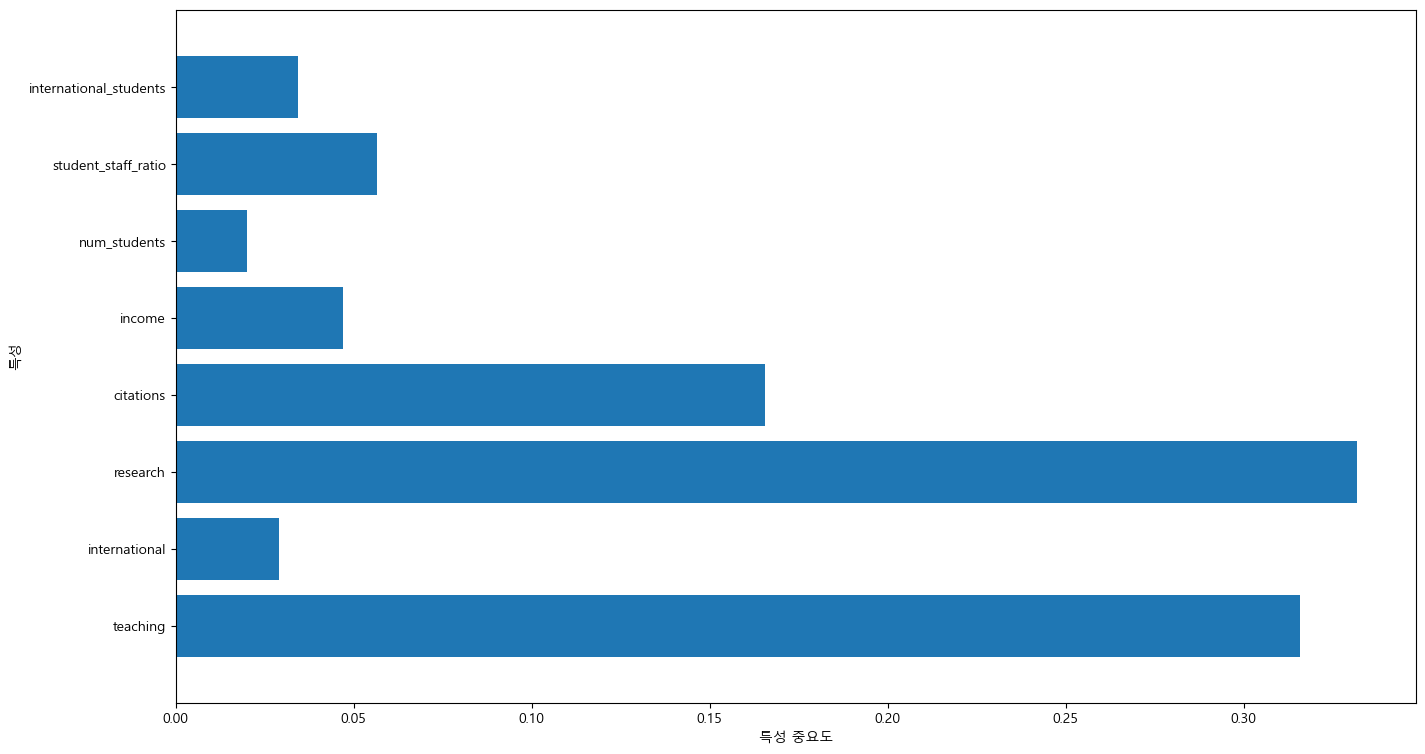

In [31]:
# 랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
# 랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다

plot_tree(forest)

In [33]:
##### KNN 사례기반 추론 모델 (단점: 데이터가 소량일 경우, 거리가 너무 먼 데이터가 많을 경우 성능이 떨어짐)

# 거리: (유클리드 거리) 직선, 연산비용 비쌈 / (맨해튼 거리) 바둑판모양으로 계산, 연산비용 저렴
# 사례기반 방식(KNN) 에서 거리계산방법 선택 가능
# 이웃의 수 k 결정 필요

from sklearn.neighbors import KNeighborsClassifier
train_rate = []
test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용
neighbors = range(1,11)
for n in neighbors:
    # 모델생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_tr_scaled, y_tr)
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(x_tr_scaled, y_tr))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(x_ts_scaled, y_ts))

test_arr = np.array(test_rate)   # 검증용 데이터셋의 정확도
max_rate = np.max(test_arr)      # 가장 좋은 정확도
idx = np.where(test_arr == max_rate)[0][0]   # 가장 성능이 좋은 인덱스
print('최적의 k: ', neighbors[idx])
print('최고 정확도: ', test_rate[idx])


c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

최적의 k:  5
최고 정확도:  0.9887640449438202


c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


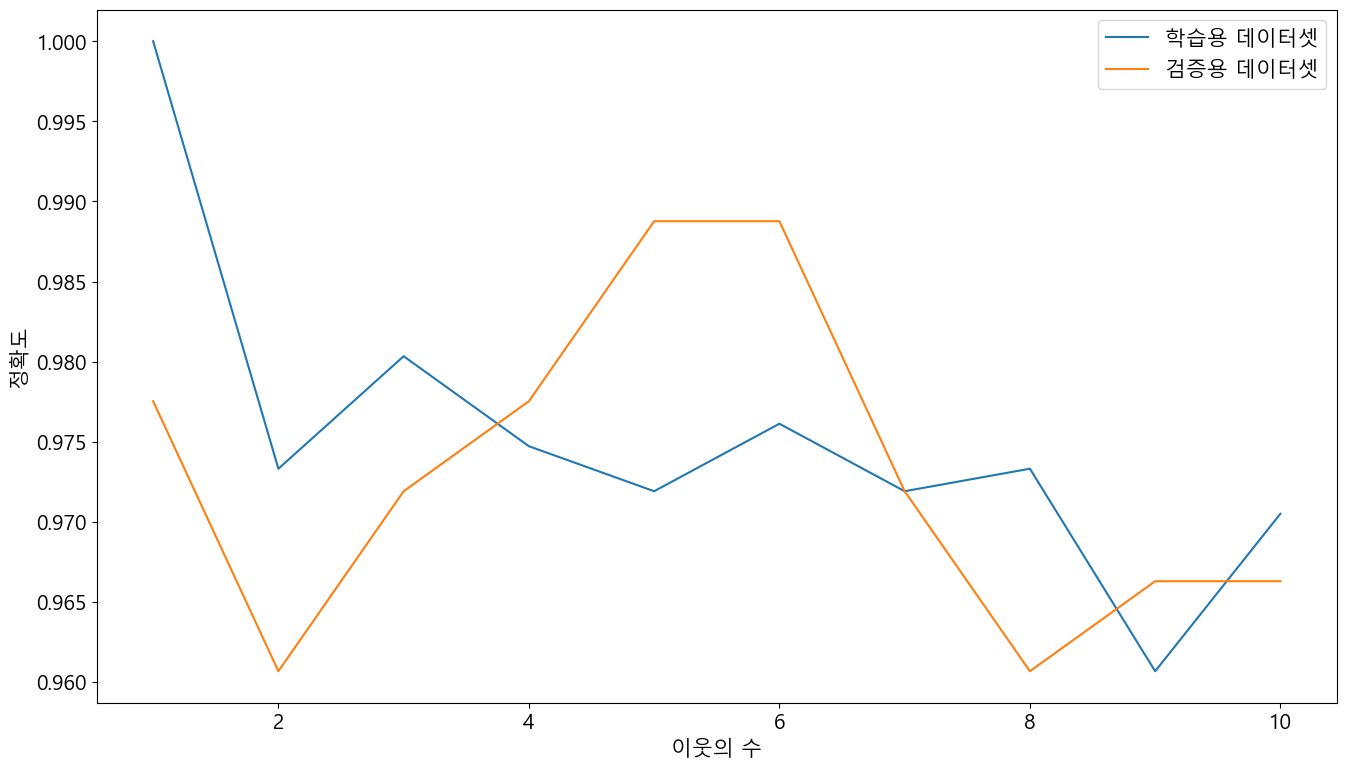

In [34]:
plt.rcParams['font.size'] = 15
plt.plot(neighbors, train_rate, label = '학습용 데이터셋')
plt.plot(neighbors, test_rate, label = '검증용 데이터셋')
plt.ylabel('정확도')
plt.xlabel('이웃의 수')
plt.legend()

# 학습용데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우, 모델이 단순해지고 정확도는 줄어듦

In [35]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_tr_scaled, y_tr)
score_tr=knn.score(x_tr_scaled, y_tr)
score_te=knn.score(x_ts_scaled, y_ts)
print("학습용:",score_tr)
print("검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9719101123595506
검증용: 0.9887640449438202


c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
##### 인공신경망 다층퍼셉트론

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_tr_scaled, y_tr)
print("학습용: ", mlp.score(x_tr_scaled, y_tr))
print("검증용: ", mlp.score(x_ts_scaled, y_ts))

c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용:  0.9929775280898876
검증용:  0.9943820224719101


c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
score_tr=mlp.score(x_tr_scaled, y_tr)
score_te=mlp.score(x_ts_scaled, y_ts)
print("학습용:",score_tr)
print("검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9929775280898876
검증용: 0.9943820224719101


In [38]:
##### SVM (Support Vector Machine) 서포트 벡터 머신
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm.fit(x_tr_scaled, y_tr)

print("학습용: ", svm.score(x_tr_scaled, y_tr))
print("검증용: ", svm.score(x_ts_scaled, y_ts))

학습용:  0.9873595505617978
검증용:  0.9887640449438202


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# 최적의 c와 gamma를 찾아보자
# c(cost): 오차에 대한 패널티, 작게주면 학습이 느리게됨?) 
# gamma: 개별 샘플의 영향력, 크게되면 모델이 특정 value에 특화가 됨

train_rate = []
test_rate = []
# c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
c_values = [0.001, 0.01, 0.1, 1, 10]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        # 모델생성
        svm = SVC(C=n, gamma=g, random_state=10)
        svm.fit(x_tr_scaled, y_tr)
        # 학습용 데이터셋 정확도
        train_rate.append([n, g, svm.score(x_tr_scaled, y_tr)])
        # 검증용 데이터셋 정확도
        test_rate.append([n, g, svm.score(x_ts_scaled, y_ts)])

train_arr = np.array(train_rate)   # 학습용 데이터셋의 정확도
test_arr = np.array(test_rate)     # 검증용 데이터셋의 정확도
max_rate = np.max(test_arr[:,2])   # 가장 좋은 정확도
idx = np.argmax(test_arr[:,2])     # 가장 성능이 좋은 인덱스

print('최적의 c: ', test_rate[idx][0])
print('최적의 gamma: ', test_rate[idx][1])
print('최고 정확도: ', test_rate[idx][2])

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

최적의 c:  1
최적의 gamma:  0.1
최고 정확도:  0.9943820224719101


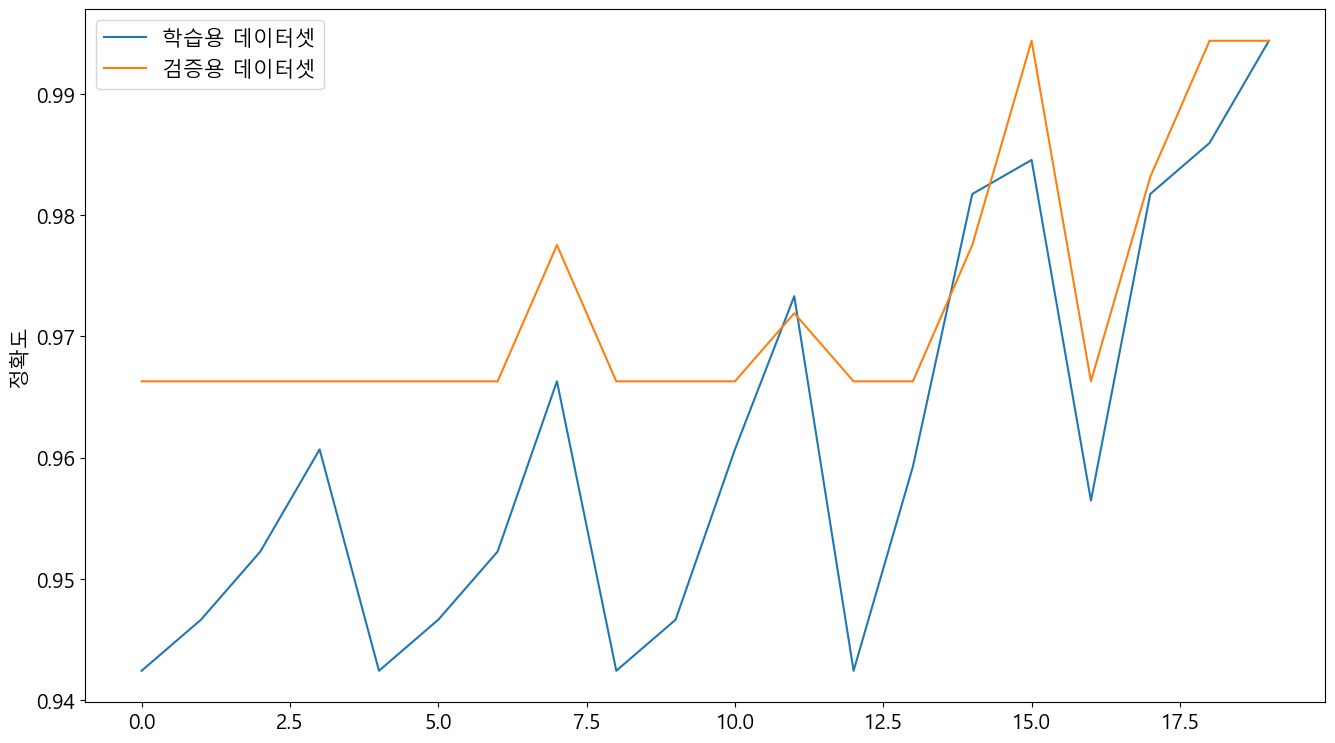

In [48]:
plt.rcParams['font.size'] = 15
plt.plot(range(len(train_rate)), train_arr[:,2], label = '학습용 데이터셋')
plt.plot(range(len(test_rate)), test_arr[:,2], label = '검증용 데이터셋')
plt.ylabel('정확도')
plt.legend()

In [49]:
svm = SVC(C=1, gamma=0.1, random_state=10)
svm.fit(x_tr_scaled, y_tr)
score_tr=svm.score(x_tr_scaled, y_tr)
score_te=svm.score(x_ts_scaled, y_ts)
print("학습용:",score_tr)
print("검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9845505617977528
검증용: 0.9943820224719101


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
##### Sequential 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, input_shape = (x.shape[1],), activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.01)
    # sgd 확률적 경사하강법
    # 학습률: 너무작으면 오래걸림 / 너무크면 학습이 잘 안 됨
model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


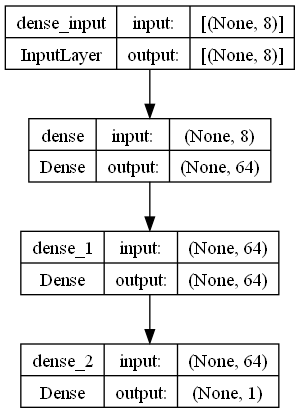

In [54]:
from keras.utils import plot_model  
plot_model(model,show_shapes=True)

In [55]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
es = EarlyStopping(monitor='val_loss', patience=5)
# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("Data/school/school_best.h5", save_best_only=True)
# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) 
# 기존 학습률*factor (배수)
# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("Data/School/mylog.csv")  
hist = model.fit(x_tr_scaled, y_tr, validation_split=0.2, epochs=500, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/500
18/18 [==============================] - 1s 16ms/step - loss: 0.6238 - accuracy: 0.7012 - val_loss: 0.6059 - val_accuracy: 0.7133 - lr: 0.0100
Epoch 2/500
18/18 [==============================] - 0s 7ms/step - loss: 0.5788 - accuracy: 0.7996 - val_loss: 0.5623 - val_accuracy: 0.7692 - lr: 0.0100
Epoch 3/500
18/18 [==============================] - 0s 7ms/step - loss: 0.5386 - accuracy: 0.8330 - val_loss: 0.5228 - val_accuracy: 0.7972 - lr: 0.0100
Epoch 4/500
18/18 [==============================] - 0s 7ms/step - loss: 0.5020 - accuracy: 0.8559 - val_loss: 0.4869 - val_accuracy: 0.8252 - lr: 0.0100
Epoch 5/500
18/18 [==============================] - 0s 14ms/step - loss: 0.4681 - accuracy: 0.8787 - val_loss: 0.4540 - val_accuracy: 0.8531 - lr: 0.0100
Epoch 6/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4371 - accuracy: 0.8928 - val_loss: 0.4240 - val_accuracy: 0.8741 - lr: 0.0100
Epoch 7/500
18/18 [==============================] - 0s 7ms/step - loss: 0

In [56]:
from keras.models import load_model  
model=load_model('Data/school/school_best.h5')  
model.evaluate(x_ts_scaled, y_ts, verbose=0)

loss, acc_tr = model.evaluate(x_tr_scaled, y_tr,  verbose=0)
loss, acc_te = model.evaluate(x_ts_scaled, y_ts,  verbose=0)
print(acc_tr)
print(acc_te)
result_tr.append(acc_tr)
result_te.append(acc_te)

0.9957864880561829
1.0


In [57]:
# 알고리즘별 예측도 그래프
methods=["Logistic","Tree","RF","KNN","ANN","SVM","DNN"]
result_tr_arr=np.array(result_tr) #검증용 데이터셋의 정확도
max_rate_tr=np.max(result_tr_arr) #가장 좋은 정확도
idx_tr=np.argmax(result_tr_arr) #가장 성능이 좋은 인덱스
result_te_arr=np.array(result_te) #검증용 데이터셋의 정확도
max_rate_te=np.max(result_te_arr) #가장 좋은 정확도
idx_te=np.argmax(result_te_arr) #가장 성능이 좋은 인덱스

print(methods)
print(result_tr)
print(result_te)
print("최적의 모형(학습용):",methods[idx_tr])
print("최고 정확도(학습용):",max_rate_tr)       
print("최적의 모형(검증용):",methods[idx_te])
print("최고 정확도(검증용):",max_rate_te)        

['Logistic', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.9887640449438202, 0.9789325842696629, 1.0, 0.9719101123595506, 0.9929775280898876, 0.9845505617977528, 0.9957864880561829]
[0.9943820224719101, 0.9775280898876404, 0.9943820224719101, 0.9887640449438202, 0.9943820224719101, 0.9943820224719101, 1.0]
최적의 모형(학습용): RF
최고 정확도(학습용): 1.0
최적의 모형(검증용): DNN
최고 정확도(검증용): 1.0


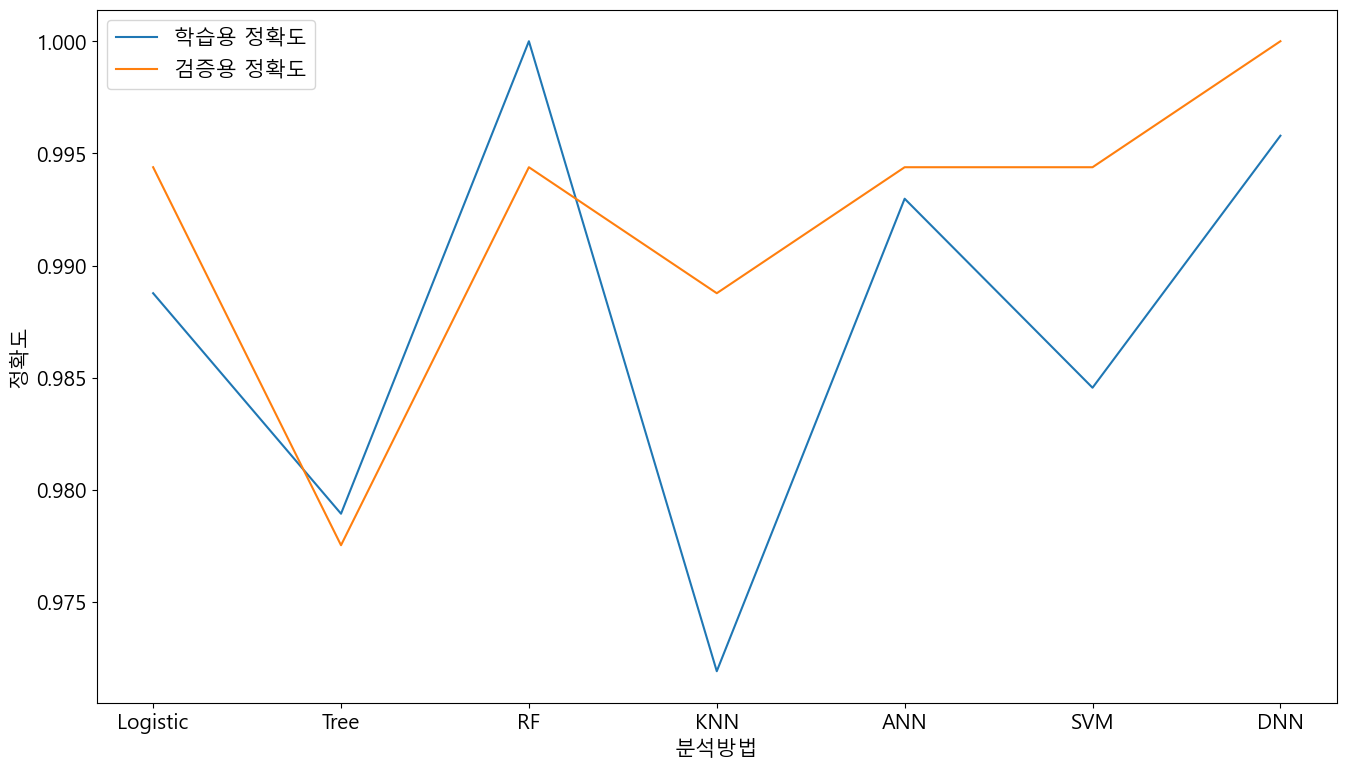

In [58]:
plt.rcParams["font.size"]=15
plt.plot(methods, result_tr_arr, label="학습용 정확도")
plt.plot(methods, result_te_arr, label="검증용 정확도")
plt.xlabel("분석방법")
plt.ylabel("정확도")
plt.legend()